In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, linear_model, metrics
import pickle

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\user\anaconda3\envs\p38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [35]:
# чтение данных: валидационная выборка
df = pd.read_csv('val.tsv',sep='\t')
libs = df.libs
df.head()

,is_virus,filename,libs
0,1,2020-02-17T21_09_26+00_00_107385.exe,"kernel32.dll,advapi32.dll,comctl32.dll,gdi32.d..."
1,0,tac.exe,"msys-intl-8.dll,msys-2.0.dll,kernel32.dll"
2,1,VirusShare_eabeaf414d1b87659870918dc7f03f8a,kernel32.dll
3,1,VirusShare_f528efa5b5ba6643b7eb9cf4264d37e4,kernel32.dll
4,1,2019-08-14T00_52_23+00_00_60898.exe,msvbvm60.dll


In [36]:
# размер валидационной выборки
df.shape

(1200, 3)

In [37]:
# наличие пропусков в данных
df.isnull().values.any()

False

In [38]:
# предобработка данных
# преобразуем исходные данные в матрицу

df_train = pd.read_csv('train.tsv',sep='\t')
libs_train = df_train.libs
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','))
vectorizer.fit_transform(libs_train)

V = vectorizer.transform(libs)
X_val = V.toarray()
y_val = df['is_virus'].to_numpy()

Class 1: 66.7%
Class 0: 33.3%


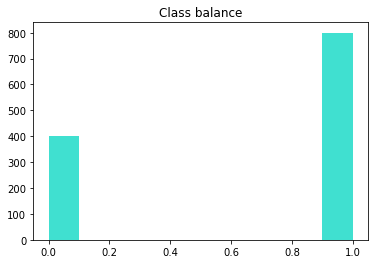

In [39]:
# Class balance
pylab.hist(y_val, color = 'turquoise')
pylab.title('Class balance')

print('Class 1: {:.1%}'.format(len(y_val[y_val==1])/len(y_val)))
print('Class 0: {:.1%}'.format(len(y_val[y_val==0])/len(y_val)))

## Оценка качества модели на валидационной выборке

In [40]:
classifier = pickle.load(open('Classifier.joblib', 'rb'))

In [41]:
print(metrics.classification_report(y_val, classifier.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       400
           1       0.88      0.95      0.91       800

    accuracy                           0.88      1200
   macro avg       0.88      0.84      0.86      1200
weighted avg       0.88      0.88      0.88      1200



In [42]:
# вывод матрицы ошибок валидационной выборки
print(metrics.confusion_matrix(y_val, classifier.predict(X_val)))

[[293 107]
 [ 38 762]]


In [43]:
tn, fp, fn, tp = metrics.confusion_matrix(y_val, classifier.predict(X_val)).ravel()
accuracy = metrics.accuracy_score(y_val, classifier.predict(X_val))
precision = metrics.precision_score(y_val, classifier.predict(X_val))
recall = metrics.recall_score(y_val, classifier.predict(X_val))
f1 = metrics.f1_score(y_val, classifier.predict(X_val))

In [44]:
lines = []
lines.append('True positive: {}'.format(tp))
lines.append('False positive {}'.format(fp))
lines.append('False negative: {}'.format(fn))
lines.append('True negative: {}'.format(tn))
lines.append('Accuracy: {:.4}'.format(accuracy))
lines.append('Precision: {:.4}'.format(precision))
lines.append('Recall: {:.4}'.format(recall))
lines.append('F1: {:.4}'.format(f1))

In [45]:
with open('validation.txt','w') as file:
    file.writelines(line + '\n' for line in lines)